In [1]:
"""
cv2.findContours() find contours on an object
modes of contour extraction cv2.RETR_EXTERNAL, cv2.RETR_LIST,
cv2.RETR_CCOMP, and cv2.RETR_TREE
"""

'\ncv2.findContours() find contours on an object\nmodes of contour extraction cv2.RETR_EXTERNAL, cv2.RETR_LIST,\ncv2.RETR_CCOMP, and cv2.RETR_TREE\n'

In [2]:
#Common Libriaries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

In [3]:
#Uploading the image
img = cv2.imread('shapes.png')

In [4]:
#now converting image to gray
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [12]:
#use findContours function from the OpenCV library to find contours
contours,hierachy=cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [15]:
#Print the number of shapes found
print('no of shapes {0}'.format(len(contours)))

no of shapes 10


In [17]:
#for loop time
for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(img, [box], 0, (0, 255,0), 3)

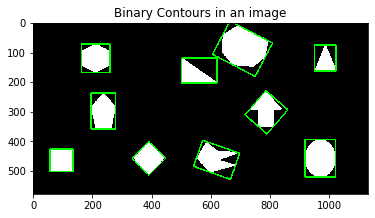

In [18]:
#Time to plot
plt.figure('Example 1')
plt.imshow(img)
plt.title('Binary Contours in an image')
plt.show()

In [19]:
# Approximating a Contour Shape using Polygon Approximation

In [20]:
#Common Libriaries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

In [21]:
#Uploading the image
img = cv2.imread('shapes.png')
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [23]:
contours,hierachy=cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [25]:
print('Shapes found: ', len(contours))

Shapes found:  10


In [26]:
#now lets draw these contours
for cnt in contours:
    epsilon = 0.01* cv2.arcLength(cnt,True)
    # Use approxPolyDP to approximate a polygon
    approx = cv2.approxPolyDP(cnt, epsilon, True) 
    # draw the approximated contours around the image using drawContorus
    img = cv2.drawContours(img, [approx], 0, (0,255,0) ,3)

<IPython.core.display.Javascript object>


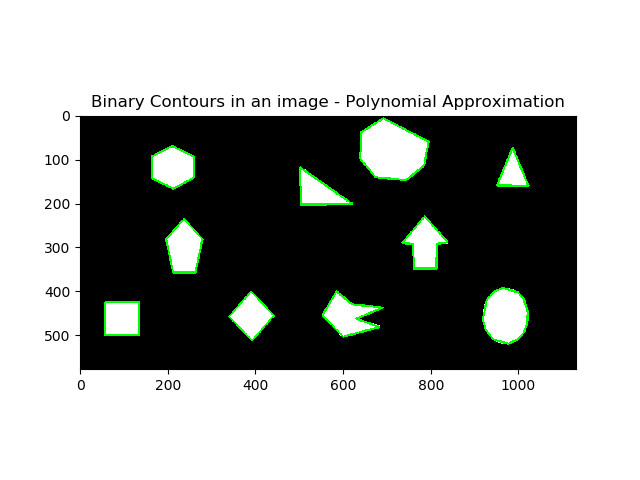

In [28]:
#Time to plot
plt.figure("Example 2")
plt.imshow(img)
plt.title('Binary Contours in an image - Polynomial Approximation')
plt.show()

In [29]:
# Capturing Hu Moments from Images

In [30]:
"""
Hu moments
"""

'\nHu moments\n'

In [31]:
#Common libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

In [35]:
#Uploading the image
img = cv2.imread('shapes.png')

In [36]:
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [37]:
contours,hierachy=cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [39]:
print("Shapes found : ", len(contours)) # should return 10

Shapes found :  10


In [40]:
#now lets draw these contours
for cnt in contours:
    
    # find the momonts of each contour using cv2.moments
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    center = (cx, cy)

    area = cv2.contourArea(cnt)
    
    # getting the contour perimeter using arcLenght
    
    perimeter = cv2.arcLength(cnt, True)
    # A -> Area P -> Permimeter
    cv2.putText(img, "A: {0:2.1f}".format(area),center, 
    cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.3 ,(255, 0, 0), 3)    
    
    cv2.putText(img, "P: {0:2.1f}".format(perimeter),(cx, cy + 30), 
    cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.3 ,(255, 0, 0), 3) 

<IPython.core.display.Javascript object>


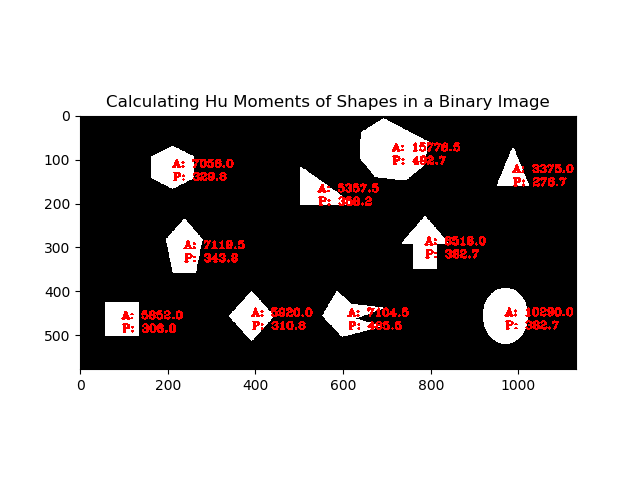

In [41]:
#Time to plot
plt.figure("Example 3")
plt.imshow(img)
plt.title('Calculating Hu Moments of Shapes in a Binary Image')
plt.show()

In [1]:
#Template Matching

In [2]:
"""
Template Matching is ...
"""

'\nTemplate Matching is ...\n'

In [3]:
#Common Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

In [4]:
target_name = 'Kalpana Chawla'

In [5]:
#Uploading the image
img = mpimg.imread('kchawla.jpg')
image = img.copy()

In [6]:
#Converting the image to gray
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [7]:
#Uploading the template
template = cv2.imread('kc_template.png',0)
w, h = template.shape[::-1]

In [9]:
#Converting the images to a uint8 type
image = np.uint8(image)
template = np.uint8(template)

In [10]:
# performing the actual template matching on the image
res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [11]:
# calculating the bounds of the template to be plotted in the next step
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [12]:
# finding the top left and the bottom right corners in the image
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

In [13]:
# rendering the boundary and the description for the template
cv2.putText(img, "Found {0}".format(target_name),top_left, 
    cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8 ,255, 3);

cv2.rectangle(img,top_left, bottom_right, (0,255,0), 2)

array([[[255, 255, 255],
        [101, 105, 114],
        [  0,  29, 106],
        ...,
        [ 57,  62,  68],
        [ 53,  58,  64],
        [ 59,  66,  72]],

       [[247, 255, 255],
        [241, 250, 219],
        [ 23,  43, 104],
        ...,
        [ 72,  79,  85],
        [ 55,  62,  68],
        [ 56,  65,  70]],

       [[135, 156, 209],
        [223, 235, 221],
        [165, 183, 205],
        ...,
        [ 64,  71,  77],
        [ 48,  57,  62],
        [ 56,  65,  70]],

       ...,

       [[147, 153, 175],
        [135, 138, 157],
        [125, 133, 146],
        ...,
        [ 23,  30,  38],
        [ 23,  30,  38],
        [ 22,  29,  37]],

       [[115, 121, 145],
        [121, 133, 147],
        [111, 107, 121],
        ...,
        [ 31,  28,  35],
        [ 32,  27,  34],
        [ 33,  28,  35]],

       [[127, 139, 161],
        [101, 103, 118],
        [133, 144, 150],
        ...,
        [ 21,  31,  33],
        [ 19,  27,  30],
        [ 23,  28,  34]]

In [14]:
plt.figure("Template Matching", figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

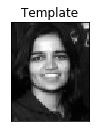

In [15]:
#Time to plot
plt.subplot(211)
plt.gray()
plt.title("Template")
plt.xticks([]), plt.yticks([])
plt.xticks([]), plt.yticks()
plt.imshow(template)

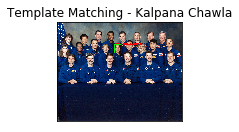

In [16]:
plt.subplot(212)
plt.title('Template Matching - Kalpana Chawla')
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.show()